In [1]:
import numpy as np,pandas as pd,matplotlib.pyplot as plt,seaborn as sns

In [2]:
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.arima.model import ARIMA
from pmdarima import auto_arima
import itertools
from sklearn.metrics import mean_squared_error
from statsmodels.tsa.stattools import acf,pacf
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf
import statsmodels.api as sm
import warnings
warnings.filterwarnings('ignore')


In [8]:
def wallmarttsa():
    store_num=int(input('Enter store Number:'))
    df=pd.read_csv('Walmart.csv')
    df=df[df['Store']==store_num]
    print(f"\nThe Store {store_num} Tabled Data:\n")
    print(df.head())
    df['Date']=pd.to_datetime(df['Date'],errors='coerce')
    df.set_index('Date',inplace=True)
    df['Weekly_Sales'].plot()
    plt.title(f'Time series plot of Store:{store_num}')
    plt.show()
    result=adfuller(df['Weekly_Sales'])
    p_value=result[1]
    print(f"Adfuller test value:{p_value}")
    if(p_value<0.05):
        print('Data is stationary')
        plot_acf(acf(df['Weekly_Sales']))
        plt.show()
        plot_pacf(pacf(df['Weekly_Sales']),lags=10)
        plt.show()
        p=range(5)
        d=range(0,1)
        q=range(5)
        pdq_combination=list(itertools.product(p,d,q))
        train=df.iloc[:-30]
        test=df.iloc[-30:]
        rmse=[]
        order1=[]
        for pdq in pdq_combination:
            model=ARIMA(df['Weekly_Sales'],order=pdq)
            model_fit=model.fit()
            pred=model_fit.predict(start=len(train),end=len(train)+len(test)-1)
            error=np.sqrt(mean_squared_error(test['Weekly_Sales'],pred))
            order1.append(pdq)
            rmse.append(error)
            mydf=pd.DataFrame({'order':order1,'RMSE':rmse})
            minvalues=mydf.loc[mydf['RMSE'].idxmin()]
            pdq1=minvalues[0]
            rmse1=minvalues[1]
            p1=pdq1[0]
            d1=pdq1[1]
            q1=pdq1[2]
        print(f"RMSE value:{rmse1}")
        print(f"p1 value:{p1}")
        print(f"d1 value:{d1}")
        print(f"q1 value:{q1}")
        model=ARIMA(df['Weekly_Sales'],order=(p1,d1,q1))
        model=model.fit()
        pred=model.predict(start=len(train),end=len(train)+len(test)-1).rename('ARIMA Predictions')
        pred.plot(legend=True)
        test['Weekly_Sales'].plot(legend=True)
        plt.show()
        index_future_dates=pd.date_range(start='26-10-2012',end='24-01-2013')
        pred=model.predict(start=len(df),end=len(df)+90).rename('12 weeks ARIMA Forecast')
        pred.index=index_future_dates
        pred.plot(legend=True)
        plt.show()
    else:
        print('Data Is Non Stationary')
        plot_acf(acf(df['Weekly_Sales']))
        plt.show()
        plot_pacf(pacf(df['Weekly_Sales']),lags=10)
        plt.show()
        def difference_and_test(timeseries,max_diff=5):
            pvalue_list=[]
            d_list=[]
            for i in range(1,max_diff+1):
                difference_series=timeseries.diff(i).dropna()
                result=adfuller(difference_series)
                pvalue_list.append(result[1])
                d_list.append(i)
                mydf=pd.DataFrame({'d_value':d_list,'p_value':pvalue_list})
                minvalue=mydf.loc[mydf['d_value'].idxmin()]
                dvalue=minvalue[0]
            return dvalue
        optimd=difference_and_test(df['Weekly_Sales'],max_diff=5)
        p=range(5)
        d=range(1,2)
        q=range(5)
        pdq_combination=list(itertools.product(p,d,q))
        train=df.iloc[:-30]
        test=df.iloc[-30:]
        rmse=[]
        order1=[]
        for pdq in pdq_combination:
            model=ARIMA(df['Weekly_Sales'],order=pdq)
            model_fit=model.fit()
            pred=model_fit.predict(start=len(train),end=len(train)+len(test)-1)
            error=np.sqrt(mean_squared_error(test['Weekly_Sales'],pred))
            order1.append(pdq)
            rmse.append(error)
            mydf=pd.DataFrame({'order':order1,'RMSE':rmse})
            minvalues=mydf.loc[mydf['RMSE'].idxmin()]
            pdq1=minvalues[0]
            rmse1=minvalues[1]
            p1=pdq1[0]
            d1=pdq1[1]
            q1=pdq1[2]
        print(f"RMSE value:{rmse1}")
        print(f"p1 value:{p1}")
        print(f"d1 value:{d1}")
        print(f"q1 value:{q1}")
        model=ARIMA(df['Weekly_Sales'],order=(p1,d1,q1))
        model=model.fit()
        pred=model.predict(start=len(train),end=len(train)+len(test)-1).rename('ARIMA Predictions')
        pred.plot(legend=True)
        test['Weekly_Sales'].plot(legend=True)
        plt.show()
        index_future_dates=pd.date_range(start='26-10-2012',end='24-01-2013')
        pred=model.predict(start=len(df),end=len(df)+90).rename('12 weeks ARIMA Forecast')
        pred.index=index_future_dates
        pred.plot(legend=True)
        plt.show()
 
    

Enter store Number:24

The Store 24 Tabled Data:

      Store        Date  Weekly_Sales  Holiday_Flag  Temperature  Fuel_Price  \
3289     24  05-02-2010    1388725.63             0        22.43       2.954   
3290     24  12-02-2010    1414107.10             1        25.94       2.940   
3291     24  19-02-2010    1385362.49             0        31.05       2.909   
3292     24  26-02-2010    1158722.74             0        33.98       2.910   
3293     24  05-03-2010    1412387.37             0        36.73       2.919   

             CPI  Unemployment  
3289  131.527903         8.326  
3290  131.586613         8.326  
3291  131.637000         8.326  
3292  131.686000         8.326  
3293  131.735000         8.326  


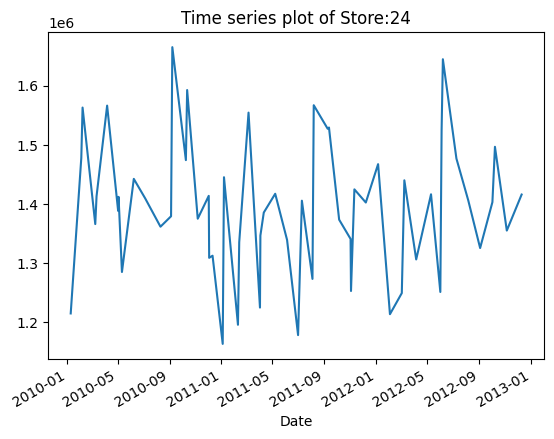

Adfuller test value:8.281608598042004e-06
Data is stationary


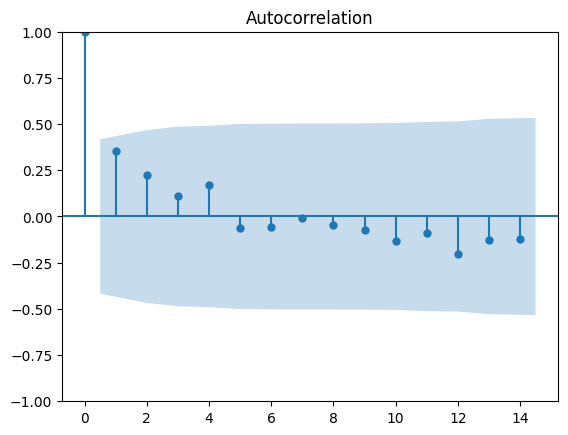

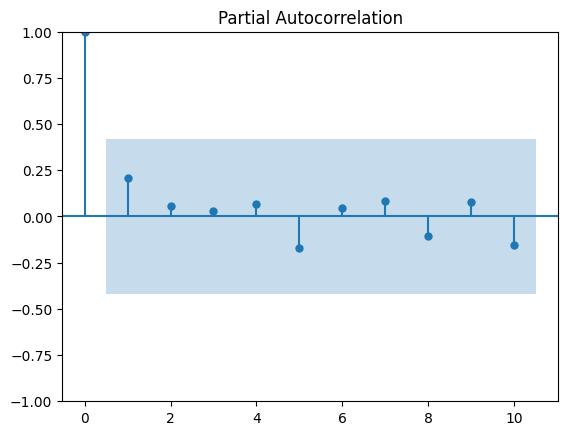

RMSE value:92500.64655407642
p1 value:4
d1 value:0
q1 value:0


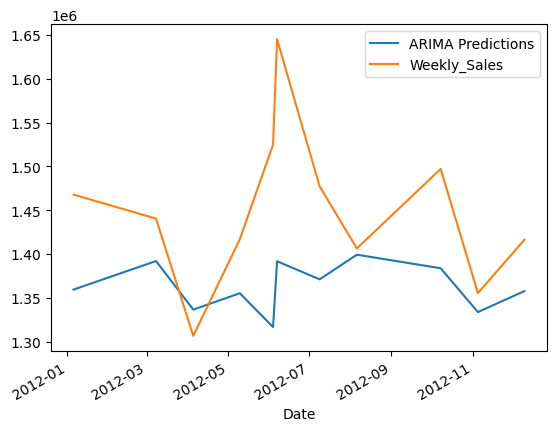

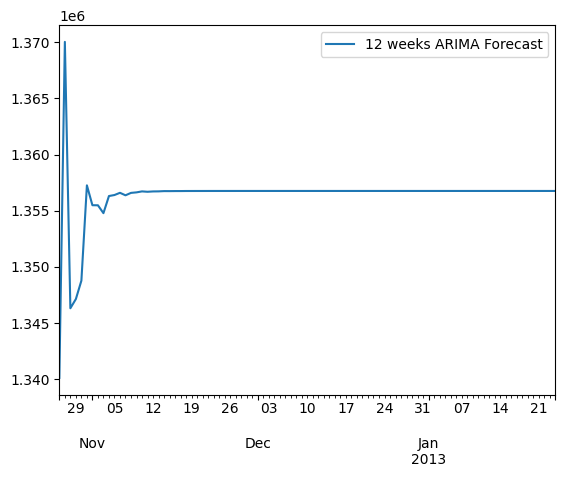

In [21]:
wallmarttsa()